<a href="https://colab.research.google.com/github/swapniladnak2510/Malaria-detection-by-cell-images-/blob/master/Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"ds2510","key":"affd4ae355af7b161ce70656519f2764"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 99% 669M/675M [00:10<00:00, 62.7MB/s]
100% 675M/675M [00:11<00:00, 64.0MB/s]


In [7]:
!unzip -q /content/cell-images-for-detecting-malaria.zip

In [9]:
import os
from glob import glob
import matplotlib.pyplot as plt

In [10]:
import numpy as np

In [11]:
dir=os.path.join('/content/cell_images/cell_images')

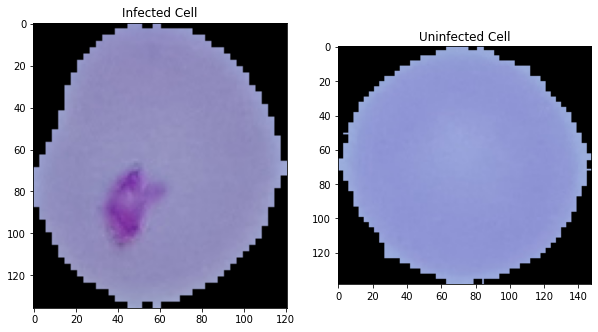

In [3]:
plt.figure(1, figsize = (10 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread('/content/cell_images/cell_images/Parasitized/C114P75ThinF_IMG_20150930_150833_cell_164.png'))
plt.title('Infected Cell')

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread('/content/cell_images/cell_images/Uninfected/C74P35_ThinF_IMG_20150815_114401_cell_14.png'))
plt.title('Uninfected Cell')

plt.show()

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [7]:
gen=ImageDataGenerator(rescale=(1/255),validation_split=0.3)

In [41]:
train=gen.flow_from_directory(
    dir,
    target_size=(90,90),
    class_mode='binary',
    color_mode='rgb',
    subset='training'
)

Found 19292 images belonging to 2 classes.


In [42]:
test=gen.flow_from_directory(
    dir,
    target_size=(90,90),
    class_mode='binary',
    color_mode='rgb',
    subset='validation'
)

Found 8266 images belonging to 2 classes.


In [59]:
a,b=np.unique(train.classes,return_counts=True)
c,d=np.unique(test.classes,return_counts=True)

In [60]:
print('Train data labels :')
print()
print('infected :',b[0])
print('Uninfected :',b[1])

Train data labels :

infected : 9646
Uninfected : 9646


In [61]:
print('Test data labels :')
print()
print('infected :',d[0])
print('Uninfected :',d[1])

Test data labels :

infected : 4133
Uninfected : 4133


In [43]:
model=tf.keras.Sequential([
  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=([90,90,3])),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(15,(3,3),activation='relu'),
  tf.keras.layers.Dropout(0.5),

  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64,activation='relu'),
  tf.keras.layers.Dense(32,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')                      




])

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 88, 88, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 42, 42, 32)        18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 19, 19, 15)        4335      
_________________________________________________________________
dropout_3 (Dropout)          (None, 19, 19, 15)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5415)             

In [45]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
class mycall(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epochs,logs={}):
    if logs['accuracy']==1.00:
      print()
      print("Model reached to it's destination \n")
      self.model.stop_training = True

In [47]:
callback=mycall()

In [48]:
metrics=model.fit(
    train,
    epochs=20,
    batch_size=128,
    callbacks=[callback]

)

Epoch 1/20
603/603 [==============================] - 19s 32ms/step - loss: 0.4226 - accuracy: 0.7858
Epoch 2/20
603/603 [==============================] - 19s 32ms/step - loss: 0.1672 - accuracy: 0.9448
Epoch 3/20
603/603 [==============================] - 19s 32ms/step - loss: 0.1425 - accuracy: 0.9559
Epoch 4/20
603/603 [==============================] - 19s 31ms/step - loss: 0.1330 - accuracy: 0.9571
Epoch 5/20
603/603 [==============================] - 19s 32ms/step - loss: 0.1209 - accuracy: 0.9589
Epoch 6/20
603/603 [==============================] - 19s 32ms/step - loss: 0.1146 - accuracy: 0.9615
Epoch 7/20
603/603 [==============================] - 19s 31ms/step - loss: 0.1091 - accuracy: 0.9636
Epoch 8/20
603/603 [==============================] - 19s 31ms/step - loss: 0.0979 - accuracy: 0.9662
Epoch 9/20
603/603 [==============================] - 19s 31ms/step - loss: 0.0972 - accuracy: 0.9672
Epoch 10/20
603/603 [==============================] - 19s 32ms/step - loss: 0.082

In [49]:
model.evaluate(test)

259/259 [==============================] - 12s 46ms/step - loss: 0.2005 - accuracy: 0.9574


[0.2005462646484375, 0.9574159383773804]

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
fig = px.line(y=metrics.history['accuracy'],x=range(1,21), title='Training accuracy with successive epochs',labels={'y':'Accuracy','x':'Epochs'})
fig.show()

In [ ]:
fig = px.line(y=metrics.history['loss'],x=range(1,21), title='Loss with successive epochs',labels={'y':'loss','x':'Epochs'})
fig.show()

In [50]:
model.save('save.h5')

In [49]:
!pip install -q streamlit

     |████████████████████████████████| 7.1MB 4.5MB/s 
     |████████████████████████████████| 102kB 12.2MB/s 
     |████████████████████████████████| 4.4MB 51.9MB/s 
     |████████████████████████████████| 112kB 55.6MB/s 
     |████████████████████████████████| 122kB 50.2MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.3.4 which is incompatible.


In [50]:
!wget https://raw.githubusercontent.com/dataprofessor/code/master/streamlit/iris-ml-app.py

--2020-08-07 10:20:16--  https://raw.githubusercontent.com/dataprofessor/code/master/streamlit/iris-ml-app.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2020-08-07 10:20:16 ERROR 404: Not Found.



In [51]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2020-08-07 10:20:24--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.3.127.107, 52.22.53.129, 52.86.203.217, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.3.127.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  16.2MB/s    in 0.8s    

2020-08-07 10:20:25 (16.2 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]



In [52]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [54]:
get_ipython().system_raw('./ngrok http 8501 &')

In [55]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: https://1b5e2335d957.ngrok.io


In [56]:
!streamlit run /content/front.py

2020-08-07 11:45:09.063483: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.197.120.106:8501

2020-08-07 11:45:10.140360: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-08-07 11:45:10.142769: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-07 11:45:10.143352: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-08-07 11:45:10.143393: I tensorflow/stream_executor/platform/